# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane seem to be the most effective regiman for the mice.  All other regimans were equal including the placebo. It was an equal review of both male and female, therefore sex was not a contributer to the regiman. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_complete = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])
 

# Display the data table for preview
mouse_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_complete['Mouse ID'].unique())
mouse_count


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_complete[mouse_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID

mouse_complete = mouse_complete.drop(136, axis=0)

# Print the new DataFrame with all headers and values
mouse_complete.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [5]:
# Checking the number of mice in the clean DataFrame.  DO NOT RUN UNTIL FIXED FOR THE REST TO RUN OR CHANGE ORDER
#new_mouse= len(mouse_complete['Mouse ID'].unique())
#new_mouse

In [6]:
# Reindex the clean DataFrame using the new column order
new_mouse = mouse_complete.loc[:, ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)','Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
new_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = new_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = new_mouse.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
tumor_var = new_mouse.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
tumor_std = new_mouse.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
tumor_sem = new_mouse.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

statistical_methods = pd.DataFrame({
                                        "Mean Tumor Volume": tumor_mean,
                                        "Median Tumor Volume": tumor_median,
                                        "Tumor Volume Variance": tumor_var,
                                        "Tumor Volume Std.Dev": tumor_std,
                                        "Tumor Volume Std.Err": tumor_sem
                                       })

statistical_methods

#print(tumor_mean)
#print(tumor_median)
#print(tumor_var)
#print(tumor_std)
#tumor_sem

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = new_mouse.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

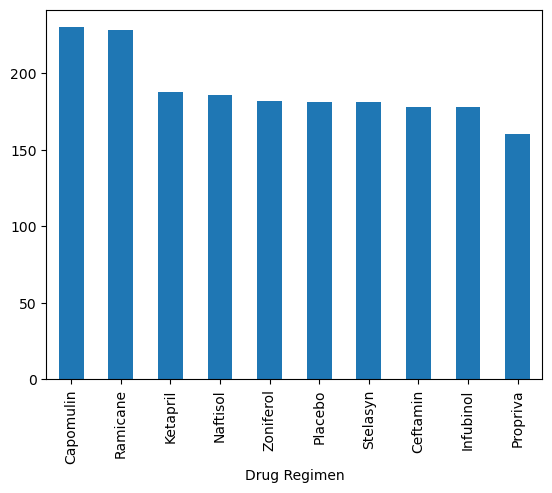

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_timepoint = new_mouse.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending=False)
mouse_timepoint.plot.bar()
plt.show()

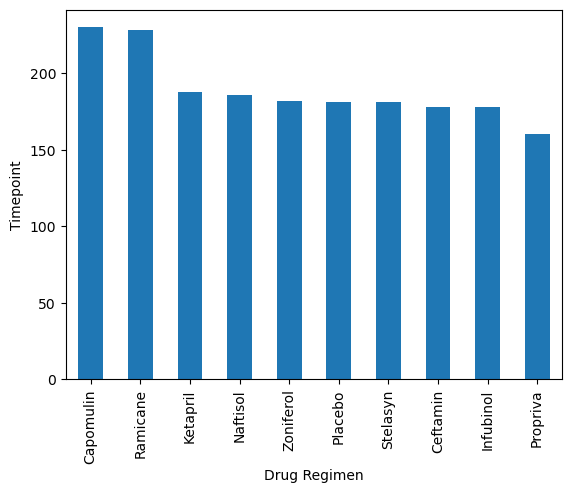

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_timepoint.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')
plt.show()

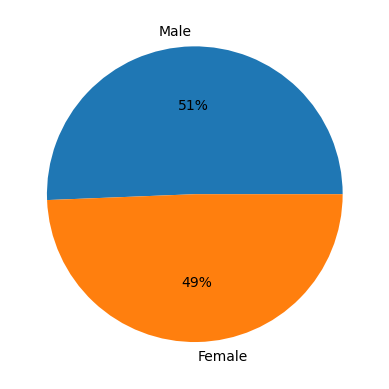

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = new_mouse['Sex'].value_counts()
sex_count.plot.pie(autopct='%1.0f%%')
plt.ylabel('')
plt.show()

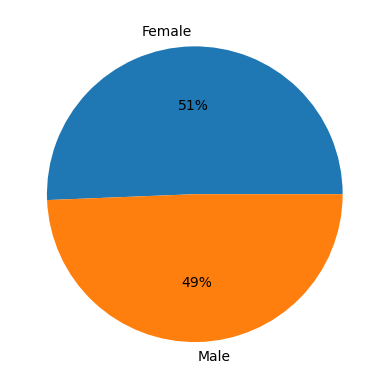

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#get a count
sex_type = new_mouse['Sex'].value_counts()
labels= ['Female', 'Male']

plt.pie(sex_type, labels=labels, autopct="%1.0f%%")
plt.axis=()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = new_mouse.groupby("Mouse ID")["Timepoint"].max()
max_timepoints

#index to Mouse ID as a column to help on the new DF
max_timepoints = max_timepoints.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(max_timepoints, new_mouse, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_vol

# get rows with the treatments requested
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_vol = final_tumor_vol[final_tumor_vol["Drug Regimen"].isin(treatments)]
final_tumor_vol.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments
# Create empty list to fill with tumor vol data (for plotting) used in next step
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    #match current treatment and final 'timepoint'
    treatment = final_tumor_vol[final_tumor_vol["Drug Regimen"] == treatment]

    #rows contain mice on each drug and get the tumor volumes
    tumor_volume = treatment["Tumor Volume (mm3)"]

    # add subset using the plot list created in the step above
    tumor_vol_data.append(tumor_volume)
        
    #need the quartiles and IQR calculations in quarter increments
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1

    # Determine outliers using upper and lower bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    #identify outliers
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    print(outliers)
    

    
   

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


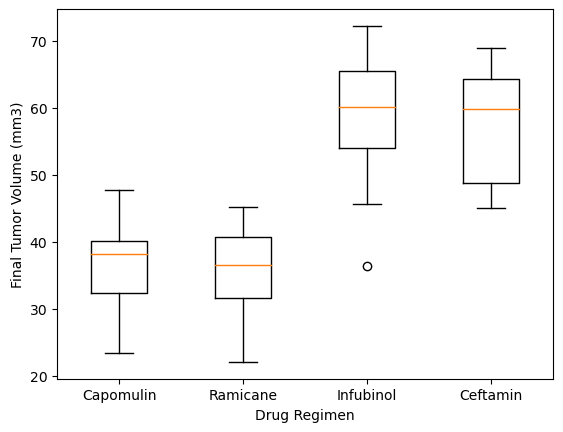

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, labels=treatments)
#create a title? not on key left just in case needed a title later
#plt.title("Final Tumor Volume by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

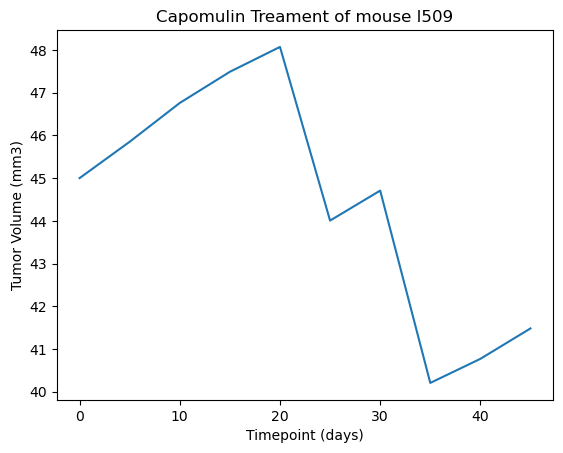

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#took id number off key for accuracy and matching of plot
mouse_id = "l509"
capomulin_mouse = new_mouse.loc[(new_mouse["Drug Regimen"] == "Capomulin") & (new_mouse["Mouse ID"] == mouse_id)]

plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treament of mouse {mouse_id}")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

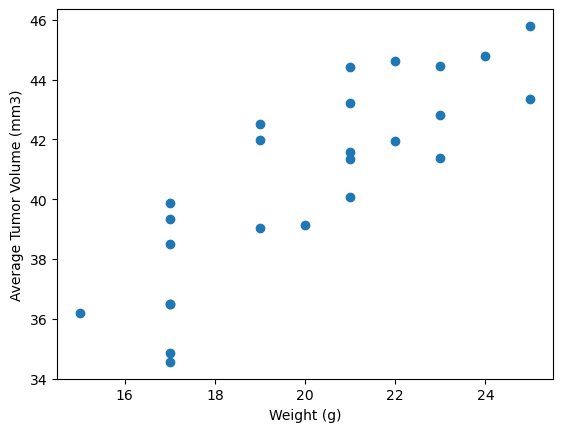

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = new_mouse[new_mouse['Drug Regimen'] == 'Capomulin']

#average tumor volume per mouse
mouse_avg_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#weight per mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, mouse_avg_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')



The correlation between mouse weight and the average tumor volume is: 0.525699555207717


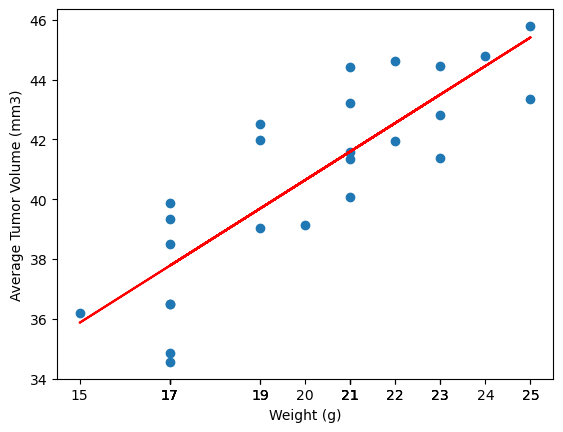

In [19]:
# Calculate the correlation coefficient and a linear regression model 

capomulin_data = new_mouse[new_mouse['Drug Regimen'] == 'Capomulin']

#average tumor volume per mouse
mouse_avg_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
#weight per mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

#linear creation
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(mouse_weight, mouse_avg_vol)
m_fit = m_slope*mouse_weight + m_int

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
r, p = st.pearsonr(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
print("The correlation between mouse weight and the average tumor volume is:", r)

#create scatter and plotline
plt.scatter(mouse_weight, mouse_avg_vol)
plt.plot(mouse_weight, m_fit, color='red')
plt.xticks(mouse_weight)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression